# Предсказание курса доллара

Skillbox День 2

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

RANDOM_SEED = 42

In [4]:
usd_rate = pd.read_excel('RC_F01_01_2017_T01_01_2020.xlsx')

In [5]:
usd_rate.head()

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США


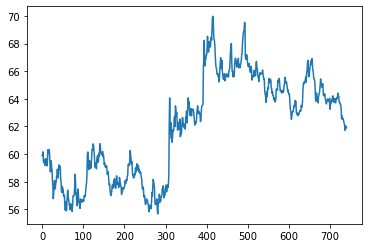

In [6]:
usd_rate.curs.plot()

In [9]:
brent_oil = pd.read_excel('brent_oil.xls', sheet_name=1, skiprows=2, names=["data", "oil_price"])

In [10]:
brent_oil.head()

,data,oil_price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [16]:
df = usd_rate.set_index('data').join(brent_oil.set_index('data'))

In [22]:
df.drop(['nominal', 'cdx'], axis=1, inplace=True)

In [24]:
df.isna().sum()

curs           0
oil_price    158
dtype: int64

In [25]:
# Заполним пропуски ffill
df.fillna(method='ffill', inplace=True)

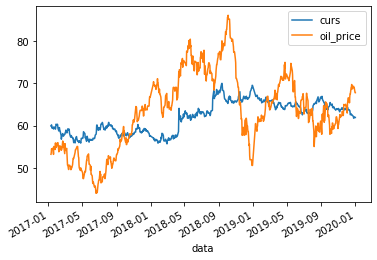

In [27]:
df.plot()

In [31]:
df.reset_index(inplace=True)

In [33]:
# Цены за нефть за 7 дней
# Цены за доллар за 7 дней
df['year'] = df.data.dt.year
df['month'] = df.data.dt.month
df['weekday'] = df.data.dt.weekday

In [34]:
df.head()

,index,data,curs,oil_price,year,month,weekday
0,0,2017-01-10,59.8961,53.20,2017,1,1
1,1,2017-01-11,59.9533,53.61,2017,1,2
2,2,2017-01-12,60.1614,54.51,2017,1,3
3,3,2017-01-13,59.4978,54.37,2017,1,4
4,4,2017-01-14,59.3700,54.37,2017,1,5


In [36]:
# Создадим колонки со сдвигом за 7 дней
past_days = 7

for idx, day in enumerate(range(past_days), start=1):
    df[f'curs_lag_{idx}'] = df.curs.shift(idx)
    df[f'oil_lag_{idx}'] = df.oil_price.shift(idx)


In [37]:
df.head()

,index,data,curs,oil_price,year,month,weekday,curs_lag_1,oil_lag_1,curs_lag_2,...,curs_lag_3,oil_lag_3,curs_lag_4,oil_lag_4,curs_lag_5,oil_lag_5,curs_lag_6,oil_lag_6,curs_lag_7,oil_lag_7
0,0,2017-01-10,59.8961,53.20,2017,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2017-01-11,59.9533,53.61,2017,1,2,59.8961,53.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017-01-12,60.1614,54.51,2017,1,3,59.9533,53.61,59.8961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2017-01-13,59.4978,54.37,2017,1,4,60.1614,54.51,59.9533,...,59.8961,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2017-01-14,59.3700,54.37,2017,1,5,59.4978,54.37,60.1614,...,59.9533,53.61,59.8961,53.2,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df['curs_week'] = df.curs.shift(1).rolling(window=7).mean()
df['oil_week'] = df.oil_price.shift(1).rolling(window=7).mean()

In [41]:
df.tail()

,index,data,curs,oil_price,year,month,weekday,curs_lag_1,oil_lag_1,curs_lag_2,...,curs_lag_4,oil_lag_4,curs_lag_5,oil_lag_5,curs_lag_6,oil_lag_6,curs_lag_7,oil_lag_7,curs_week,oil_week
736,736,2019-12-26,61.7164,69.26,2019,12,3,62.1673,69.26,62.2499,...,62.5283,68.66,62.5831,69.70,62.5326,69.12,62.7686,68.99,62.312100,69.131429
737,737,2019-12-27,61.7676,68.91,2019,12,4,61.7164,69.26,62.1673,...,62.4071,68.66,62.5283,68.66,62.5831,69.70,62.5326,69.12,62.202814,69.101429
738,738,2019-12-28,62.0315,68.91,2019,12,5,61.7676,68.91,61.7164,...,62.2499,69.26,62.4071,68.66,62.5283,68.66,62.5831,69.70,62.124014,68.988571
739,739,2019-12-31,61.9057,67.77,2019,12,1,62.0315,68.91,61.7676,...,62.1673,69.26,62.2499,69.26,62.4071,68.66,62.5283,68.66,62.035071,68.861429
740,740,2020-01-01,61.9057,67.77,2020,1,2,61.9057,67.77,62.0315,...,61.7164,69.26,62.1673,69.26,62.2499,69.26,62.4071,68.66,61.963443,68.734286


In [66]:
# Подготовка к обучению
final_df = pd.get_dummies(df, columns=['year', 'month', 'weekday'])
final_df.drop(['data', 'oil_price'], axis=1, inplace=True)
final_df.dropna(inplace=True)
final_df.reset_index(inplace=True, drop=True)
final_df.drop(['index'], axis=1, inplace=True)

In [67]:
final_df.head()

,curs,curs_lag_1,oil_lag_1,curs_lag_2,oil_lag_2,curs_lag_3,oil_lag_3,curs_lag_4,oil_lag_4,curs_lag_5,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,59.1830,59.4015,53.77,59.6067,54.68,59.3700,54.37,59.4978,54.37,60.1614,...,0,0,0,0,0,0,1,0,0,0
1,59.3521,59.1830,53.18,59.4015,53.77,59.6067,54.68,59.3700,54.37,59.4978,...,0,0,0,0,0,0,0,1,0,0
2,59.6697,59.3521,55.04,59.1830,53.18,59.4015,53.77,59.6067,54.68,59.3700,...,0,0,0,0,0,0,0,0,1,0
3,59.5034,59.6697,55.04,59.3521,55.04,59.1830,53.18,59.4015,53.77,59.6067,...,0,0,0,0,1,0,0,0,0,0
4,59.2168,59.5034,54.70,59.6697,55.04,59.3521,55.04,59.1830,53.18,59.4015,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# Входные данные
X = final_df.drop(['curs'], axis=1) 
y = final_df.curs # curs - наш таргет

,curs_lag_1,oil_lag_1,curs_lag_2,oil_lag_2,curs_lag_3,oil_lag_3,curs_lag_4,oil_lag_4,curs_lag_5,oil_lag_5,...,month_9,month_10,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,59.4015,53.77,59.6067,54.68,59.3700,54.37,59.4978,54.37,60.1614,54.51,...,0,0,0,0,0,0,1,0,0,0
1,59.1830,53.18,59.4015,53.77,59.6067,54.68,59.3700,54.37,59.4978,54.37,...,0,0,0,0,0,0,0,1,0,0
2,59.3521,55.04,59.1830,53.18,59.4015,53.77,59.6067,54.68,59.3700,54.37,...,0,0,0,0,0,0,0,0,1,0
3,59.6697,55.04,59.3521,55.04,59.1830,53.18,59.4015,53.77,59.6067,54.68,...,0,0,0,0,1,0,0,0,0,0
4,59.5034,54.70,59.6697,55.04,59.3521,55.04,59.1830,53.18,59.4015,53.77,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,62.1673,69.26,62.2499,69.26,62.4071,68.66,62.5283,68.66,62.5831,69.70,...,0,0,0,1,0,0,1,0,0,0
730,61.7164,69.26,62.1673,69.26,62.2499,69.26,62.4071,68.66,62.5283,68.66,...,0,0,0,1,0,0,0,1,0,0
731,61.7676,68.91,61.7164,69.26,62.1673,69.26,62.2499,69.26,62.4071,68.66,...,0,0,0,1,0,0,0,0,1,0
732,62.0315,68.91,61.7676,68.91,61.7164,69.26,62.1673,69.26,62.2499,69.26,...,0,0,0,1,1,0,0,0,0,0


## Подготовка к обучению модели

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### LinealRegression

In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

from sklearn.metrics import mean_absolute_error

mape = mean_absolute_error(y_test, prediction)
print(f'MAE: {mape}')

MAE: 0.3322100512312276


### MLPRegressor

In [121]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(activation='identity', hidden_layer_sizes=(250, 300, 300, 250), max_iter=1000, random_state=RANDOM_SEED)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

from sklearn.metrics import mean_absolute_error

mape = mean_absolute_error(y_test, prediction)
print(f'MAE: {mape}')

MAE: 0.4233343869809205


MAE: 0.3322100512312276


# Домашнее задание

- Использовать тот же датасет что и в эфире
- Использовать random_state=42 там где это применимо
- Критерием оценки ДЗ является выполнение пунктов, описанных ниже, при этом нам НЕ важно какая конкретно у вас получилась ошибка, у нас конкурс работ а не конкурс “у кого самая маленькая ошибка”.

- Задание 1. Используйте модель MLPRegressor и поменяйте ее настройки чтобы получить ошибку (mae) меньше чем в эфире.
- Задание 2. Попробуйте использовать три других модели регрессии из sklearn (которые мы еще не пробовали), и настройте их так чтобы получить как можно меньшую ошибку
- Задание 3. Сложное задание. Попробуйте делать предсказания не на 1 день вперед а на 5 дней вперед.
- Задание 4. Попробуйте также взять разное количество дней для предсказаний, мы использовали 7 дней, что будет если изменить это число?
- Задание 5. Сложное задание. Постройте графики с помощью matplotlib (см. Примеры https://matplotlib.org/3.2.1/gallery/index.html_
Не стесняйтесь построить разные графики для разных моделей, сравнить модели между собой, построить зависимости точности модели от каких-то параметров.
- Задание 6. Сделайте выводы о проделанной нами с вами работе, например напишите о задаче, о подходе, о моделях, о параметрах, об оценке качества и т.д.
